In [11]:
import pandas as pd


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv("clean_contact_dataset.csv",encoding='latin', low_memory=False)

In [14]:
action_list=["Resume_Tailoring_Tips__c","Hire_Heroes_USA_Confirmed_Hire__c","Used_Volunteer_Services__c","VCF_Participant__c","Virtual_Workshop_Participant__c","On_Job_Board__c","Used_Federal_Services__c","Interview_Skills__c",
"Created_LinkedIn_account__c","Value_Proposition__c","Updated_Resume_Complete__c","HHUSA_Workshop_Participant__c","O2O_Initial_Assessment_Complete__c",
"Is_the_Initial_Intake_Assessment_done__c","Permission_to_use_job_board_granted__c","Finalized_HHUSA_revised_resume_on_file__c"]

In [15]:
data=data[action_list]

# General Methods

In [16]:
def count_table(dataFrame,feature):
    dataset_by_feature = dataFrame.groupby(feature)
    countTable = dataset_by_feature[feature].agg(['count'])
    total_feature = countTable.values.sum()
    proportion = np.divide(countTable['count'], total_feature/100)
    countTable['%'] = proportion
    countTable = countTable.reset_index()
    return countTable.nlargest(25, 'count')
def summary(dataFrame,feature):
    plot = count_table(dataFrame,feature).plot(x = feature, y = '%', kind = 'bar')
    plt.show()
    return count_table(dataFrame,feature)
def compare(feature1, feature2, data):
    data0 = data.loc[data[feature2]==0]
    data1 = data.loc[data[feature2]==1]
    #print(data0.shape)
    #print(data1.shape)
    data0_by_feature = data0.groupby(feature1)
    data1_by_feature = data1.groupby(feature1)
    countTable0 = data0_by_feature[feature1].agg(['count'])
    countTable1 = data1_by_feature[feature1].agg(['count'])
    countTable0.rename(columns={'count': '0'}, inplace=True)
    countTable1.rename(columns={'count': '1'}, inplace=True)
    countTable = pd.merge(countTable0, countTable1, on=feature1)
    #total_feature = countTable.values.sum()
    #proportion = np.divide(countTable['count'], total_feature/100)
    countTable['Not Hired'] = countTable['0']/(countTable['0'] + countTable['1'])*100
    countTable['Hired'] = countTable['1']/(countTable['0'] + countTable['1'])*100
    countTable['Difference'] = countTable['Hired'] - countTable['Not Hired']
    countTable = countTable.reset_index()
    ind = np.arange(len(countTable))
    totals = [i+j for i,j in zip(countTable['0'], countTable['1'])]
    bar0 = [i / j * 100 for i,j in zip(countTable['0'], totals)]
    bar1 = [i / j * 100 for i,j in zip(countTable['1'], totals)]
    #print(bar0)
    #print(bar1)
    width = 0.9
    plt.figure(num=None, figsize=(3, 6), dpi=80, facecolor='w', edgecolor='k')
    p1 = plt.bar(ind, bar1, color='orange', width=width, label='1 = Hired')
    p2 = plt.bar(ind, bar0, color='blue', bottom=bar1, width=width, label='0 = Not Hired')
    plt.xticks(ind, countTable[feature1].values)
    plt.yticks(np.arange(0, 101, 10))
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    plt.show()
    print("Difference in Hired =", abs(bar1[0]-bar1[1]))
    return countTable

# Used_Volunteer_Services__c

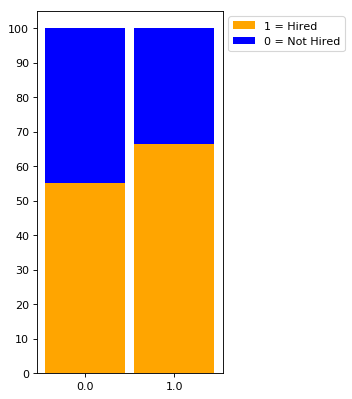

Difference in Hired = 11.209245657852541


,Used_Volunteer_Services__c,0,1,Not Hired,Hired,Difference
0,0.0,16765,20641,44.819013,55.180987,10.361974
1,1.0,1459,2882,33.609767,66.390233,32.780465


In [17]:
#summary(confirmed_hire,'Used_Volunteer_Services__c')
compare("Used_Volunteer_Services__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# VCF_Participant__c

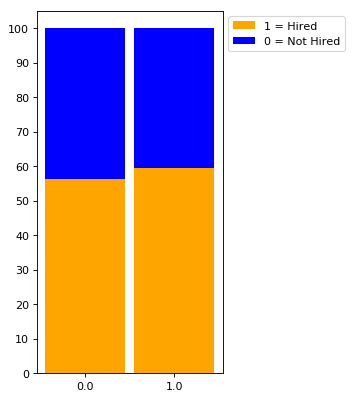

Difference in Hired = 3.1442491196606355


,VCF_Participant__c,0,1,Not Hired,Hired,Difference
0,0.0,17871,23006,43.718962,56.281038,12.562076
1,1.0,353,517,40.574713,59.425287,18.850575


In [18]:
#summary(confirmed_hire,'VCF_Participant__c')
compare("VCF_Participant__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Virtual_Workshop_Participant__c

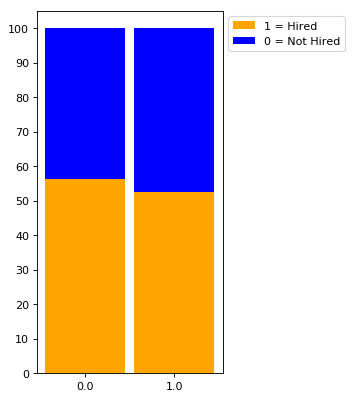

Difference in Hired = 3.8773901609253727


,Virtual_Workshop_Participant__c,0,1,Not Hired,Hired,Difference
0,0.0,18157,23449,43.64034,56.35966,12.719319
1,1.0,67,74,47.51773,52.48227,4.964539


In [19]:

compare("Virtual_Workshop_Participant__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# On_Job_Board__c

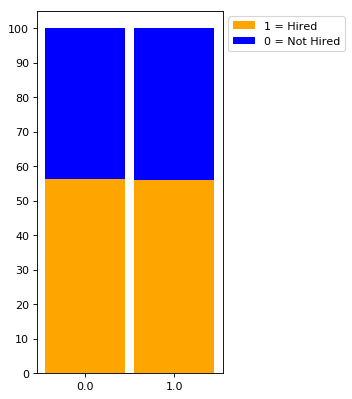

Difference in Hired = 0.36006833030356233


,On_Job_Board__c,0,1,Not Hired,Hired,Difference
0,0.0,15574,20145,43.601445,56.398555,12.797111
1,1.0,2650,3378,43.961513,56.038487,12.076974


In [20]:

compare("On_Job_Board__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Used_Federal_Services__c

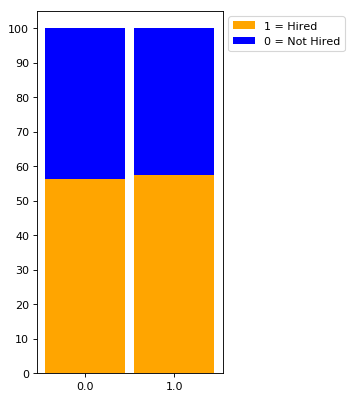

Difference in Hired = 1.2835256787859919


,Used_Federal_Services__c,0,1,Not Hired,Hired,Difference
0,0.0,17301,22271,43.720307,56.279693,12.559385
1,1.0,923,1252,42.436782,57.563218,15.126437


In [21]:

compare("Used_Federal_Services__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Interview_Skills__c

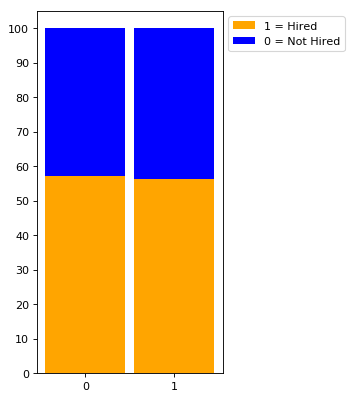

Difference in Hired = 0.9218199517375609


,Interview_Skills__c,0,1,Not Hired,Hired,Difference
0,0,3275,4359,42.900183,57.099817,14.199633
1,1,14949,19164,43.822003,56.177997,12.355993


In [22]:
compare("Interview_Skills__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Created_LinkedIn_account__c

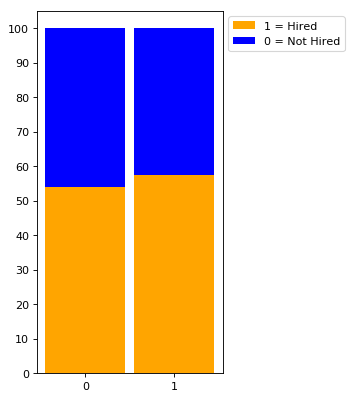

Difference in Hired = 3.571461634752417


,Created_LinkedIn_account__c,0,1,Not Hired,Hired,Difference
0,0,6507,7634,46.015133,53.984867,7.969733
1,1,11717,15889,42.443672,57.556328,15.112657


In [23]:
compare("Created_LinkedIn_account__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Value_Proposition__c

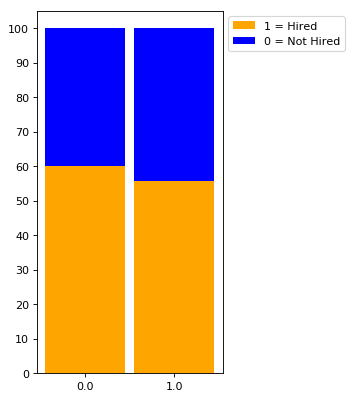

Difference in Hired = 4.540929892038449


,Value_Proposition__c,0,1,Not Hired,Hired,Difference
0,0.0,2643,3992,39.834213,60.165787,20.331575
1,1.0,15581,19531,44.375142,55.624858,11.249715


In [24]:
compare("Value_Proposition__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Updated_Resume_Complete__c

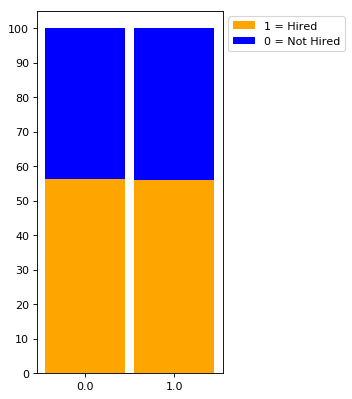

Difference in Hired = 0.2573432180823758


,Updated_Resume_Complete__c,0,1,Not Hired,Hired,Difference
0,0.0,17630,22764,43.645096,56.354904,12.709808
1,1.0,594,759,43.902439,56.097561,12.195122


In [25]:

compare("Updated_Resume_Complete__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# HHUSA_Workshop_Participant__c

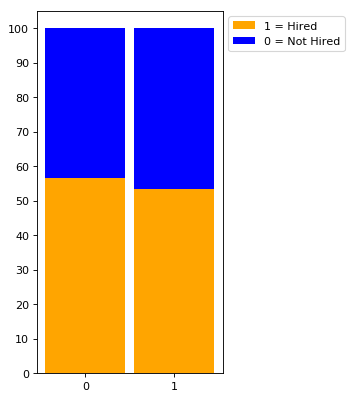

Difference in Hired = 3.1552739551972877


,HHUSA_Workshop_Participant__c,0,1,Not Hired,Hired,Difference
0,0,16385,21408,43.354589,56.645411,13.290821
1,1,1839,2115,46.509863,53.490137,6.980273


In [26]:
compare("HHUSA_Workshop_Participant__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# O2O_Initial_Assessment_Complete__c

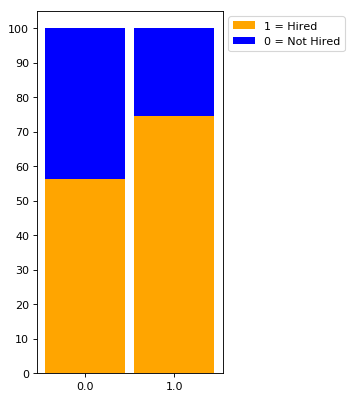

Difference in Hired = 18.225226284806332


,O2O_Initial_Assessment_Complete__c,0,1,Not Hired,Hired,Difference
0,0.0,18127,23241,43.818894,56.181106,12.362212
1,1.0,97,282,25.593668,74.406332,48.812665


In [27]:
#summary(confirmed_hire,'O2O_Initial_Assessment_Complete__c')
compare("O2O_Initial_Assessment_Complete__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Is_the_Initial_Intake_Assessment_done__c

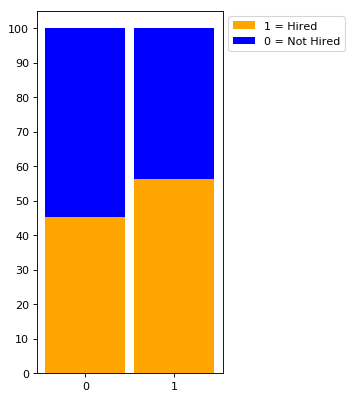

Difference in Hired = 11.165625004785873


,Is_the_Initial_Intake_Assessment_done__c,0,1,Not Hired,Hired,Difference
0,0,86,71,54.777070,45.222930,-9.55414
1,1,18138,23452,43.611445,56.388555,12.77711


In [28]:
compare("Is_the_Initial_Intake_Assessment_done__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Permission_to_use_job_board_granted__c

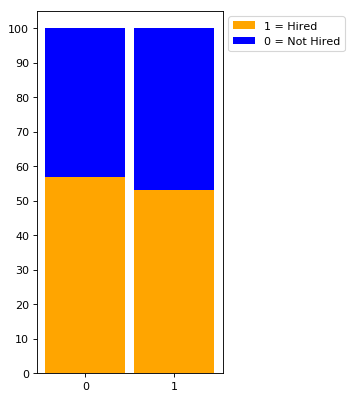

Difference in Hired = 3.6242047463808333


,Permission_to_use_job_board_granted__c,0,1,Not Hired,Hired,Difference
0,0,15631,20575,43.172402,56.827598,13.655195
1,1,2593,2948,46.796607,53.203393,6.406786


In [29]:
compare("Permission_to_use_job_board_granted__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Finalized_HHUSA_revised_resume_on_file__c

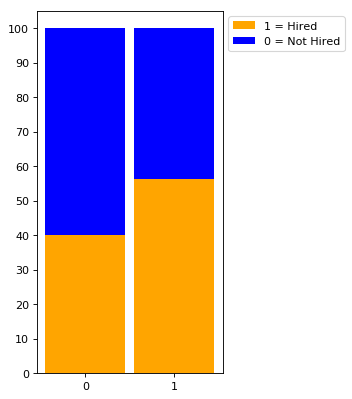

Difference in Hired = 16.360280015343314


,Finalized_HHUSA_revised_resume_on_file__c,0,1,Not Hired,Hired,Difference
0,0,21,14,60.00000,40.00000,-20.00000
1,1,18203,23509,43.63972,56.36028,12.72056


In [30]:
compare("Finalized_HHUSA_revised_resume_on_file__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# Resume_Tailoring_Tips__c

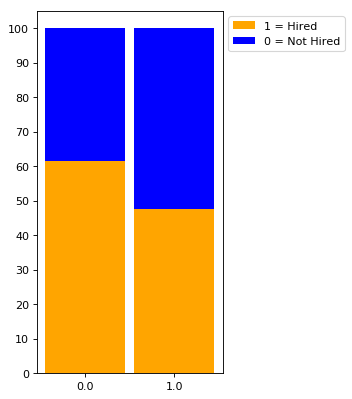

Difference in Hired = 13.917565677372416


,Resume_Tailoring_Tips__c,0,1,Not Hired,Hired,Difference
0,0.0,10170,16222,38.534404,61.465596,22.931191
1,1.0,8054,7301,52.451970,47.548030,-4.903940


In [31]:
compare("Resume_Tailoring_Tips__c", "Hire_Heroes_USA_Confirmed_Hire__c", data)

# to check if the person conducting assesment influences the hiring chances

In [32]:
def count_unique_null(contact_dataset,feature):
    print("Unique Values:", contact_dataset[feature].nunique())
    print("Null Values:", contact_dataset[feature].isna().sum())
    print("Null Values %:", contact_dataset[feature].isna().sum()/len(contact_dataset.index)*100)
def count_table(contact_dataset,feature):
    contact_dataset_by_feature = contact_dataset.groupby(feature)
    countTable = contact_dataset_by_feature[feature].agg(['count'])
    total_feature = countTable.values.sum()
    proportion = np.divide(countTable['count'], total_feature/100)
    countTable['%'] = proportion
    countTable = countTable.reset_index()
    return countTable.nlargest(25, 'count')
def summary(contact_dataset,feature):
    count_unique_null(contact_dataset,feature)
    plot = count_table(contact_dataset,feature).plot(x = feature, y = '%', kind = 'bar')
    plt.show()
    return count_table(contact_dataset,feature)

In [33]:
    contact=pd.read_csv('SalesForce_Contact.csv', encoding='latin', low_memory=False)

Unique Values: 171
Null Values: 79170
Null Values %: 59.775755974177954


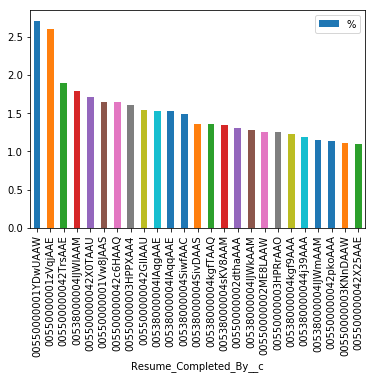

,Resume_Completed_By__c,count,%
103,00550000001YDwUAAW,1444,2.710465
106,00550000001zVqjAAE,1389,2.607227
148,005500000042TrsAAE,1013,1.901455
32,00538000004lJWlAAM,955,1.792586
151,005500000042X0TAAU,914,1.715626
98,00550000001Vw8JAAS,880,1.651807
155,005500000042c6HAAQ,875,1.642421
128,00550000003HPPXAA4,858,1.610511
145,005500000042GlIAAU,820,1.539183
29,00538000004lAqgAAE,814,1.527921


In [34]:
summary(contact,'Resume_Completed_By__c')

In [35]:
Contact_confirmed_hire=contact.loc[contact["Hire_Heroes_USA_Confirmed_Hire__c"]==1]

In [36]:
Result_without_Filtering=(Contact_confirmed_hire.reset_index()
          .groupby(['Resume_Completed_By__c'])['Resume_Completed_By__c']
          .count().rename(columns={'count':'Count'})
       )

In [37]:
Result_without_Filtering=Result_without_Filtering.to_frame().reset_index()

In [38]:
names=['Resume_Completed_By__c', 'Total_Count']

In [39]:
Result_without_Filtering.columns = names

In [40]:
Resume_evaluation=Contact_confirmed_hire.loc[Contact_confirmed_hire["Revised_Resume_Used_to_Apply_for_Job__c"]=="Yes"]

In [41]:
result = (Resume_evaluation.reset_index()
          .groupby(['Resume_Completed_By__c'])['Resume_Completed_By__c']
          .count().rename(columns={'count':'Count'})
       )

In [42]:
names=['Resume_Completed_By__c', 'Total_Count']

In [43]:
result=result.to_frame().reset_index()

In [44]:
names=['Resume_Completed_By__c', 'Count']

In [45]:
result.columns = names

In [46]:
result.head(3)

,Resume_Completed_By__c,Count
0,00538000003nrcXAAQ,2
1,005380000044j39AAA,297
2,00538000004SivDAAS,340


In [47]:
final_dataset = pd.merge(Result_without_Filtering, result, left_on='Resume_Completed_By__c', right_on='Resume_Completed_By__c')

In [48]:
final_dataset.head(3)

,Resume_Completed_By__c,Total_Count,Count
0,00538000003nrcXAAQ,2,2
1,005380000044j39AAA,382,297
2,00538000004SivDAAS,443,340


In [49]:
final_dataset['Yes_percentage']=(final_dataset['Count']/final_dataset['Total_Count'])*100

In [50]:
final_dataset.head(10)

,Resume_Completed_By__c,Total_Count,Count,Yes_percentage
0,00538000003nrcXAAQ,2,2,100.000000
1,005380000044j39AAA,382,297,77.748691
2,00538000004SivDAAS,443,340,76.749436
3,00538000004SivXAAS,199,167,83.919598
4,00538000004SiwBAAS,133,114,85.714286
5,00538000004SiwLAAS,215,198,92.093023
6,00538000004SiwfAAC,373,258,69.168901
7,00538000004SsftAAC,149,132,88.590604
8,00538000004kCkJAAU,197,173,87.817259
9,00538000004kgd8AAA,226,184,81.415929


# Feature Selection

In [51]:
#Univariate Selection

In [52]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [53]:
Independent_Variables=["Resume_Tailoring_Tips__c","Used_Volunteer_Services__c","VCF_Participant__c","Virtual_Workshop_Participant__c","On_Job_Board__c","Used_Federal_Services__c","Interview_Skills__c",
"Created_LinkedIn_account__c","Value_Proposition__c","Updated_Resume_Complete__c","HHUSA_Workshop_Participant__c","O2O_Initial_Assessment_Complete__c",
"Is_the_Initial_Intake_Assessment_done__c","Permission_to_use_job_board_granted__c","Finalized_HHUSA_revised_resume_on_file__c"]

In [54]:
X=data[Independent_Variables]

In [55]:
data=pd.read_csv("clean_contact_dataset.csv",encoding='latin', low_memory=False)

In [56]:
Y=data['Hire_Heroes_USA_Confirmed_Hire__c']

In [57]:
test = SelectKBest(score_func=chi2, k=4)

In [58]:
from sklearn.feature_selection import RFE

In [59]:

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[4.833e+02 1.780e+02 3.353e+00 8.560e-01 2.326e-01 1.309e+00 3.941e-01
 1.643e+01 7.435e+00 3.411e-02 1.312e+01 5.025e+01 2.981e-02 2.226e+01
 3.190e-03]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [60]:
#Features and their corresponging scores
#Resume_Tailoring_Tips__c------------------>4.833e+02
#Used_Volunteer_Services__c---------------->1.780e+02
#VCF_Participant__c------------------------>3.353e+00
#Virtual_Workshop_Participant__c------------>8.560e-01
#On_Job_Board__c---------------------------->2.326e-01
#Used_Federal_Services__c------------------->1.309e+00
#Interview_Skills__c------------------------>3.941e-01
#Created_LinkedIn_account__c---------------->1.643e+01
#Value_Proposition__c----------------------->7.435e+00
#Updated_Resume_Complete__c----------------->3.411e-02
#HHUSA_Workshop_Participant__c-------------->1.312e+01
#O2O_Initial_Assessment_Complete__c--------->5.025e+01
#Is_the_Initial_Intake_Assessment_done__c---->2.981e-02
#Permission_to_use_job_board_granted__c------->2.226e+01
#Finalized_HHUSA_revised_resume_on_file__c---->3.190e-03


